In [6]:
%matplotlib inline

import psrqpy
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as pl

In [58]:
q = psrqpy.QueryATNF(params=['P0', 'P1', 'P1_I', 'ASSOC', 'TYPE', 'BINARY'])

In [63]:
t = q.table()

In [44]:
def deathline(logP, linemodel='Ip', rho6=1.):
    """
    Pulsar death line. Returns log10 period derivative at the given
    values of the period. The death line models can be:
      'I' - Equation 3 of Zhang, Harding & Muslimov, 2000, ApJ (astro-ph/0001341)
      'Ip' - Equation 4 of ZHM
      'II' - Equation 5 of ZHM
      'IIp' - Equation 6 of ZHM
      'III' - Equation 8 of ZHM
      'IIIp' - Equation 9 of ZHM
      'IV' - Equation 10 of ZHM
      'IVp' - Equation 11 of ZHM
      
    The default rho6 of 1 is 10^6 cm.
    """
    
    gradvals = {'I': (11./4), 'Ip': (9./4.), 'II': (2./11.), 'IIp': -(2./11.), 'III': (5./2.), 'IIIp': 2., 'IV': -(3./11.), 'IVp': -(7./11.)}
    intercept = {'I': 14.62, 'Ip': 16.58, 'II': 13.07, 'IIp': 14.50, 'III': 14.56, 'IIIp': 16.52, 'IV': 15.36, 'IVp': 16.79}
    rho = {'I': 0., 'Ip': 1., 'II': 0., 'IIp': (8./11.), 'III': 0., 'IIIp': 1., 'IV': 0., 'IVp': (8./11.)}
    
    lp = logP
    if not isinstance(lp, np.ndarray):
        lp = np.array(lp)

    return lp*gradvals[linemodel] - intercept[linemodel] + rho[linemodel]*np.log10(rho6)

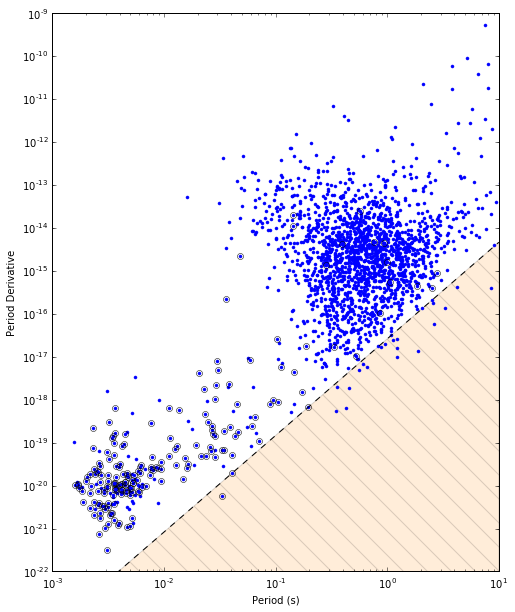

In [74]:
fig, ax = pl.subplots(figsize=(8,10))

intrinsicpdot = True

periods = t['P0']
pdots = t['P1']
if intrinsicpdot: # use instrinsic period derivatives if requested
    ipdotidx = (np.isfinite(t['P1_I'])) & (t['P1_I'] > 0.)
    pdots[ipdotidx] = t['P1_I'][ipdotidx]

pidx = (np.isfinite(periods)) & (np.isfinite(pdots)) & (pdots > 0.)

periods = periods[pidx]
pdots = pdots[pidx]

assocs = t['ASSOC'][pidx]   # associations
types = t['TYPE'][pidx]    # pulsar types
binarys = t['BINARY'][pidx] # binary pulsars

ax.loglog(periods, pdots, '.')
ax.set_xlabel(r'Period (s)')
ax.set_ylabel(r'Period Derivative')

periodlims = [10**np.floor(np.min(np.log10(periods))), 10.*int(np.ceil(np.max(pdots)/10.))]
pdotlims = [10**np.floor(np.min(np.log10(pdots))), 10**np.ceil(np.max(np.log10(pdots)))]
ax.set_xlim(periodlims);
ax.set_ylim(pdotlims);

showbinaries = True
if showbinaries:
    bidx = binarys != '*'
    ax.loglog(periods[bidx], pdots[bidx], marker='o', markerfacecolor='none', color='grey', linestyle='none')

adddeathline=True
filldeath = True

if adddeathline:
    deathpdots = 10**deathline(np.log10(periodlims))
    ax.loglog(periodlims, deathpdots, 'k--')
    
    if filldeath:
        ax.fill_between(periodlims, deathpdots, pdotlims[0], linestyle='-', alpha=0.15,
                        facecolor='darkorange', hatch='\\')
        
# add markers for each pulsar type

# add characteristic age lines

# add magnetic field lines

In [65]:
t

P0,P0_ERR,P1,P1_ERR,P1_I,ASSOC,TYPE,BINARY
s,s,,,,,,
float64,float64,float64,float64,float64,str32,str32,str5
0.115363568268,1.4e-12,5.96703e-15,7e-20,nan,GRS:3FGL_J0002.6+6218[aaa+15],NRAD,*
0.69374767047,1.4e-10,2.097e-15,1.2e-17,nan,*,*,*
0.3158731909,3e-10,3.6039e-13,5e-17,nan,"GRS:2FGL_J0007.0+7303[naa+12],XR",NRAD,*
2.55287,0.0,nan,0.0,nan,*,*,*
1.24069903895,1.1e-11,5.6e-16,1.4e-19,5.6e-16,*,*,*
0.0030502031041,3e-17,9.6e-21,5e-24,9.6e-21,"GRS:3FGL_J0023.4+0923[aaa+15],OP",HE,ELL1
0.00455444738391,3e-15,-4.54e-21,7e-23,-5.02e-21,*,*,*
0.00184,0.0,nan,0.0,nan,GC:47Tuc,*,*


In [66]:
bidx = t['BINARY'] != '*'

In [68]:
bidx[20]

True